In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import trompy as tp

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42  # Ensure fonts are embedded as Type 3 fonts

In [3]:
DATAFOLDER = Path("..\\data")
FIGSFOLDER = Path("..\\figures")
FIGSFOLDER = Path("C:\\Users\\jmc010\\Dropbox\\Publications in Progress\\IPP Giulia paper\\figs")

save_figs = True

In [4]:
def plot_error(df, x_columns, ax=None, color="red"):

    mean = df[x_columns].mean()
    sem = df[x_columns].sem()
    x = np.arange(len(mean))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    
    ax.plot(mean, color=color)
    ax.fill_between(x, mean - sem, mean + sem, color=color, alpha=0.3)

## Panel S2A - weight of food in grams

In [5]:
def tweak_df(df):
    
    return (df
            .map(lambda x: x / 2 if isinstance(x, (int, float)) else x)
    )

df = pd.read_csv(DATAFOLDER / "foodintake.csv", sep=";").drop(columns=["cage"])
df = tweak_df(df)

group_column = 'diet'  # Replace with the actual column name for grouping
x_columns = df.columns.difference([group_column])

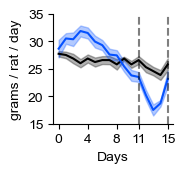

In [6]:
f, ax = plt.subplots(1, 1, figsize=(2, 2),
                     gridspec_kw={"left": 0.3, "right": 0.9, "top": 0.8, "bottom": 0.25})

df_nr = df.query("diet == 'NR'")
df_pr = df.query("diet == 'PR'")

plot_error(df_nr, x_columns, ax=ax, color="black")
plot_error(df_pr, x_columns, ax=ax, color="xkcd:electric blue")

ax.set_xticks(np.arange(len(x_columns)), labels=np.arange(len(x_columns)))
ax.set_xlabel("Days")
ax.set_ylabel("grams / rat / day")

ax.set_ylim(15, 35)
ax.set_yticks([15, 20, 25, 30, 35])
ax.set_xticks([0, 4, 8, 11, 15])

# ax.axvline(8, color="black", linestyle="--", alpha=0.5)
ax.axvline(11, color="black", linestyle="--", alpha=0.5)
ax.axvline(15, color="black", linestyle="--", alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

if save_figs:
    f.savefig(FIGSFOLDER / "S2A_grams_per_day.pdf", dpi=300)

## Panel S2B - food intake in kcals

In [7]:
def tweak_df_in_kcal(df):

    df_nr = (df
             .query("diet == 'NR'")
             .map(lambda x: x * 3.4 / 2 if isinstance(x, (int, float)) else x)
    )

    df_pr = (df
             .query("diet == 'PR'")
             .map(lambda x: x * 4 / 2 if isinstance(x, (int, float)) else x)
    )

    return (pd
            .concat([df_nr, df_pr])
            .drop(columns=["cage"])
    )

df = pd.read_csv(DATAFOLDER / "foodintake.csv", sep=";")
df = tweak_df_in_kcal(df)

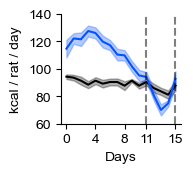

In [8]:
f, ax = plt.subplots(1, 1, figsize=(2, 2),
                     gridspec_kw={"left": 0.3, "right": 0.9, "top": 0.8, "bottom": 0.25})

df_nr = df.query("diet == 'NR'")
df_pr = df.query("diet == 'PR'")

plot_error(df_nr, x_columns, ax=ax, color="black")
plot_error(df_pr, x_columns, ax=ax, color="xkcd:electric blue")

ax.set_xticks(np.arange(len(x_columns)), labels=np.arange(len(x_columns)))
ax.set_xlabel("Days")
ax.set_ylabel("kcal / rat / day")

ax.set_ylim(60, 140)
ax.set_yticks(np.arange(60, 141, 20))
ax.set_xticks([0, 4, 8, 11, 15])

# ax.axvline(8, color="black", linestyle="--", alpha=0.5)
ax.axvline(11, color="black", linestyle="--", alpha=0.5)
ax.axvline(15, color="black", linestyle="--", alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

if save_figs:
    f.savefig(FIGSFOLDER / "S2B_kcal_per_day.pdf", dpi=300)

In [9]:
def tweak_df_in_g_protein(df):

    df_nr = (df
             .query("diet == 'NR'")
             .map(lambda x: x * 0.22 / 2 if isinstance(x, (int, float)) else x)
    )

    df_pr = (df
             .query("diet == 'PR'")
             .map(lambda x: x * 0.04 / 2 if isinstance(x, (int, float)) else x)
    )

    return (pd
            .concat([df_nr, df_pr])
            .drop(columns=["cage"])
    )

df = pd.read_csv(DATAFOLDER / "foodintake.csv", sep=";")
df = tweak_df_in_g_protein(df)

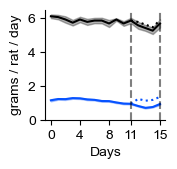

In [10]:
f, ax = plt.subplots(1, 1, figsize=(2, 2),
                     gridspec_kw={"left": 0.3, "right": 0.9, "top": 0.8, "bottom": 0.25})

df_nr = df.query("diet == 'NR'")
df_pr = df.query("diet == 'PR'")

df_nr_ = df.query("diet == 'NR'")
df_pr_ = df.query("diet == 'PR'")

df_nr_.iloc[:, 13:] = df_nr_.iloc[:, 13:] + 0.2
df_pr_.iloc[:, 13:] = df_pr_.iloc[:, 13:] + 0.42

plot_error(df_nr, x_columns, ax=ax, color="black")
plot_error(df_pr, x_columns, ax=ax, color="xkcd:electric blue")

ax.plot(df_nr_.mean(numeric_only=True).iloc[11:], color="black", linestyle=":")
ax.plot(df_pr_.mean(numeric_only=True).iloc[11:], color="xkcd:electric blue", linestyle=":")

ax.set_xticks(np.arange(len(x_columns)), labels=np.arange(len(x_columns)))
ax.set_xlabel("Days")
ax.set_ylabel("grams / rat / day")

ax.set_yticks([0, 2, 4, 6])
ax.set_xticks([0, 4, 8, 11, 15])

# ax.axvline(8, color="black", linestyle="--", alpha=0.5)
ax.axvline(11, color="black", linestyle="--", alpha=0.5)
ax.axvline(15, color="black", linestyle="--", alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

if save_figs:
    f.savefig(FIGSFOLDER / "S2C_g_protein_per_day.pdf", dpi=300)

NR rats drink average of 5.09 mL or 0.20 g protein
PR rats drink average of 10.58 mL or 0.42 g protein

Add this amount to each group